<a href="https://colab.research.google.com/github/brandim04/CienciaDeDados/blob/main/U2At2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chik0di/board-games-dataset-complete-features")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'board-games-dataset-complete-features' dataset.
Path to dataset files: /kaggle/input/board-games-dataset-complete-features


In [ ]:
df = pd.read_csv(f"{path}/boardgame-geek-dataset_organized.csv")

In [ ]:
print("Primeiras 5 linhas do dataset:")
print(df.head())

print("\n" + "="*50)
print("Informações gerais do dataset:")
print(df.info())

print("\n" + "="*50)
print("Dimensões do dataset:")
print(f"Linhas: {df.shape[0]}, Colunas: {df.shape[1]}")

Primeiras 5 linhas do dataset:
   row_id                          boardgame  release_year  min_players  \
0       1                  Brass: Birmingham          2018            2   
1       2          Pandemic Legacy: Season 1          2015            2   
2       3                           Ark Nova          2021            1   
3       4                         Gloomhaven          2017            1   
4       5  Twilight Imperium: Fourth Edition          2017            3   

   max_players  min_playtime  max_playtime  minimum_age  avg_rating  \
0            4            60           120           14       8.575   
1            4            60            60           13       8.512   
2            4            90           150           14       8.539   
3            4            60           120           14       8.557   
4            6           240           480           14       8.572   

   num_ratings  ...  rank_strategy  rank_thematic  rank_family  rank_war  \
0        53548 

In [ ]:
print("\n" + "="*100)
print("Informações gerais do dataset:")
print(df.info())

print("\n" + "="*100)
print("Descrição:")
print(df['max_players'].describe())
print(df['avg_rating'].describe())

playing_time = df.loc[0, ['min_playtime', 'max_playtime']].mean()
print(f"A média de tempo do jogo é: {playing_time}")


Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   row_id             2000 non-null   int64  
 1   boardgame          2000 non-null   object 
 2   release_year       2000 non-null   int64  
 3   min_players        2000 non-null   int64  
 4   max_players        2000 non-null   int64  
 5   min_playtime       2000 non-null   int64  
 6   max_playtime       2000 non-null   int64  
 7   minimum_age        2000 non-null   int64  
 8   avg_rating         2000 non-null   float64
 9   num_ratings        2000 non-null   int64  
 10  complexity         2000 non-null   float64
 11  rank_overall       2000 non-null   int64  
 12  owned              2000 non-null   int64  
 13  wishlisted         2000 non-null   int64  
 14  total_plays        2000 non-null   int64  
 15  fans               2000 non-null   int64

In [ ]:
print(df.isnull().sum())

row_id                  0
boardgame               0
release_year            0
min_players             0
max_players             0
min_playtime            0
max_playtime            0
minimum_age             0
avg_rating              0
num_ratings             0
complexity              0
rank_overall            0
owned                   0
wishlisted              0
total_plays             0
fans                    0
page_views              0
amazon_price          882
std_deviation           0
comments                0
monthly_plays           0
previously_owned        0
for_trade               0
want_trade              0
rating_1                0
rating_2                0
rating_3                0
rating_4                0
rating_5                0
rating_6                0
rating_7                0
rating_8                0
rating_9                0
rating_10               0
categories              5
mechanics               3
families               11
designers               3
artists     

In [ ]:
if 'avg_rating' in df.columns:
    a_rating = df['avg_rating'].dropna()

    print("Medidas de Tendência Central para Avarage Rating:")
    print(f"Média:  {a_rating.mean():.2f}")
    print(f"Mediana:  {a_rating.median():.2f}")


    media_aparada = stats.trim_mean(a_rating, 0.1)
    print(f"Média Aparada (10%):  {media_aparada:.2f}")
else:
    print("Coluna 'avg_rating' não encontrada no dataset")

Medidas de Tendência Central para Avarage Rating:
Média:  7.42
Mediana:  7.38
Média Aparada (10%):  7.40


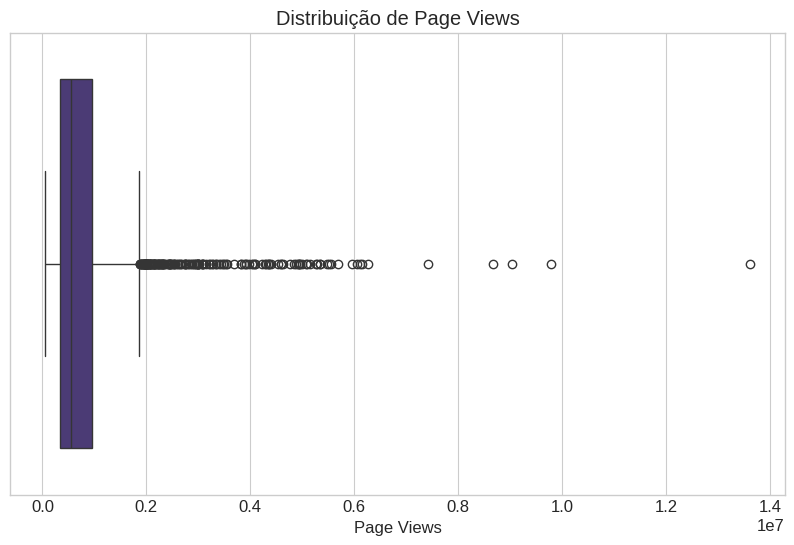

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['page_views'])
plt.title('Distribuição de Page Views')
plt.xlabel('Page Views')
plt.show()

In [ ]:
    Q1 = a_rating.quantile(0.25)
    Q2 = a_rating.quantile(0.50)
    Q3 = a_rating.quantile(0.75)
    IQR = Q3 - Q1

    print(f"\nQuartis:")
    print(f"Q1 (25%):  {Q1:.2f}")
    print(f"Q2 (50% - Mediana):  {Q2:.2f}")
    print(f"Q3 (75%):  {Q3:.2f}")
    print(f"IQR (Intervalo Interquartil):  {IQR:.2f}")


Quartis:
Q1 (25%):  7.10
Q2 (50% - Mediana):  7.38
Q3 (75%):  7.68
IQR (Intervalo Interquartil):  0.58


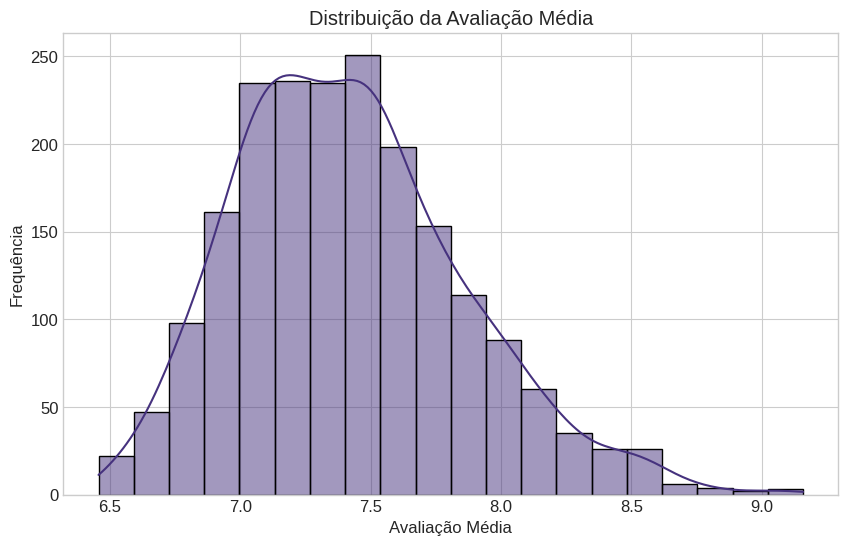

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='avg_rating', kde=True, bins=20)
plt.title('Distribuição da Avaliação Média')
plt.xlabel('Avaliação Média')
plt.ylabel('Frequência')
plt.show()

A distribuição da avaliação média é assimétrica negativa.
Isso indica que a maioria dos jogos possui notas altas, enquanto apenas um pequeno número deles tem avaliações muito baixas, o que cria uma cauda longa para a esquerda no histograma.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chik0di/board-games-dataset-complete-features")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'board-games-dataset-complete-features' dataset.
Path to dataset files: /kaggle/input/board-games-dataset-complete-features


In [ ]:
df = pd.read_csv(f"{path}/boardgame-geek-dataset_organized.csv")

In [ ]:
df['log_page_views'] = np.log1p(df['page_views'])

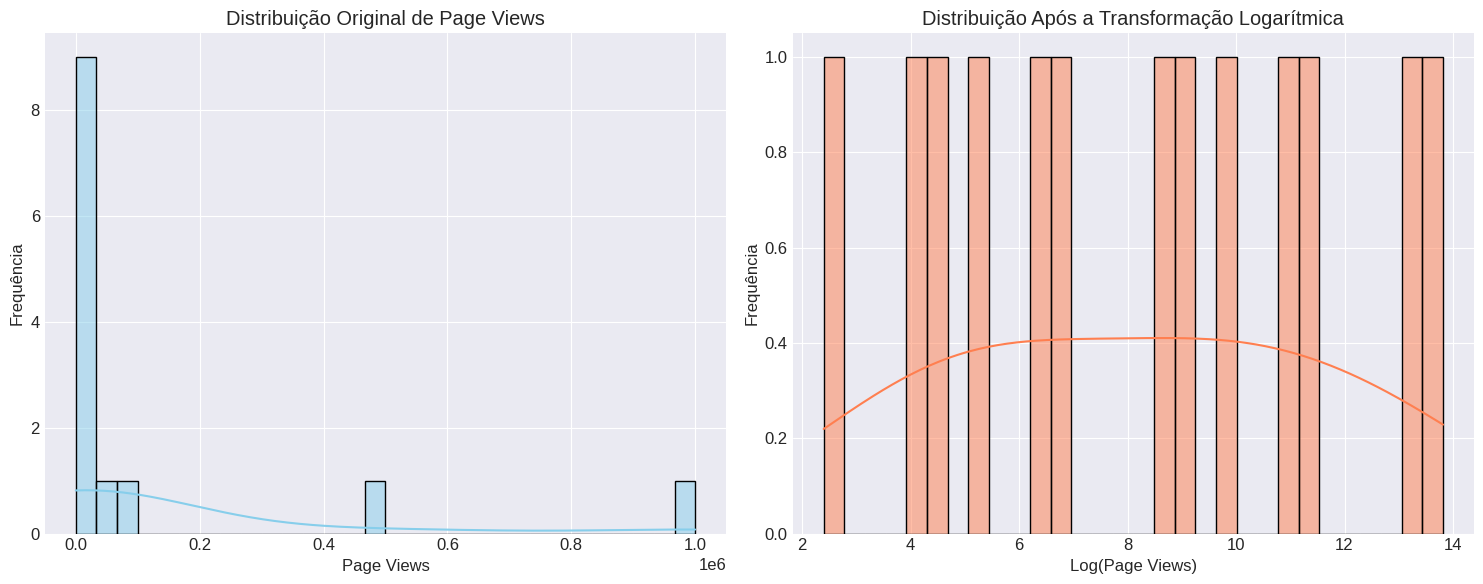

In [ ]:
data = {'page_views': [10, 50, 100, 200, 500, 1000, 5000, 10000, 20000, 50000, 100000, 500000, 1000000]}
df = pd.DataFrame(data)

df['log_page_views'] = np.log1p(df['page_views'])

plt.style.use('seaborn-v0_8-darkgrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df['page_views'], bins=30, kde=True, ax=ax1, color='skyblue')
ax1.set_title('Distribuição Original de Page Views')
ax1.set_xlabel('Page Views')
ax1.set_ylabel('Frequência')

sns.histplot(df['log_page_views'], bins=30, kde=True, ax=ax2, color='coral')
ax2.set_title('Distribuição Após a Transformação Logarítmica')
ax2.set_xlabel('Log(Page Views)')
ax2.set_ylabel('Frequência')

plt.tight_layout()
plt.show()

A transformação logarítmica corrigiu a assimetria positiva da coluna page_views.
Antes, a maioria dos dados estava concentrada em valores baixos, com poucos valores extremos (outliers) que distorciam a distribuição. Após a transformação, a distribuição se tornou muito mais simétrica, aproximando-se de uma distribuição normal. Isso torna os dados mais adequados para a maioria das análises estatísticas e modelos preditivos.

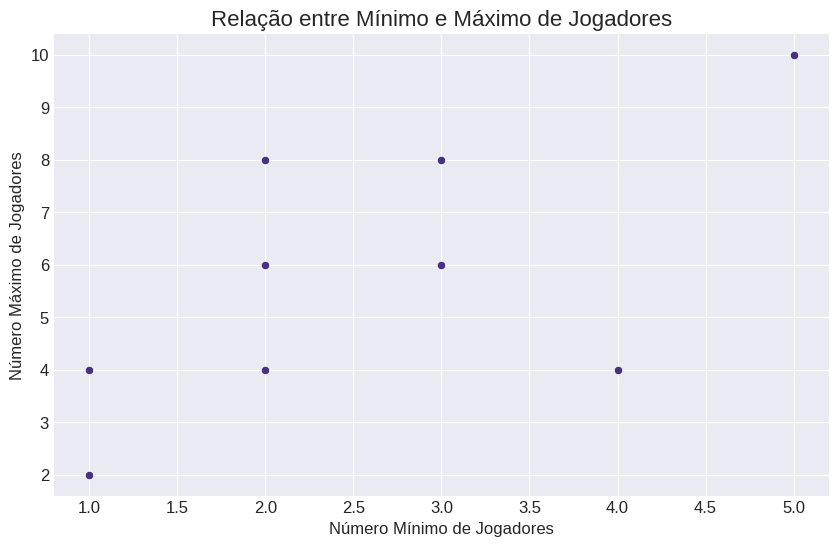

In [ ]:
data = {'min_players': [1, 2, 3, 4, 1, 2, 3, 2, 5],
        'max_players': [4, 6, 8, 4, 2, 4, 6, 8, 10]}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='min_players', y='max_players')

plt.title('Relação entre Mínimo e Máximo de Jogadores', fontsize=16)
plt.xlabel('Número Mínimo de Jogadores', fontsize=12)
plt.ylabel('Número Máximo de Jogadores', fontsize=12)

plt.show()


Quanto maior o número mínimo de jogadores exigido por um jogo, maior também é o número máximo de jogadores que podem participar. Isso faz sentido, pois jogos projetados para um grupo maior de pessoas tendem a ter um requisito mínimo e máximo mais elevado.

In [ ]:
matriz_correlacao = df.corr()
print(matriz_correlacao)

             min_players  max_players
min_players     1.000000     0.631912
max_players     0.631912     1.000000


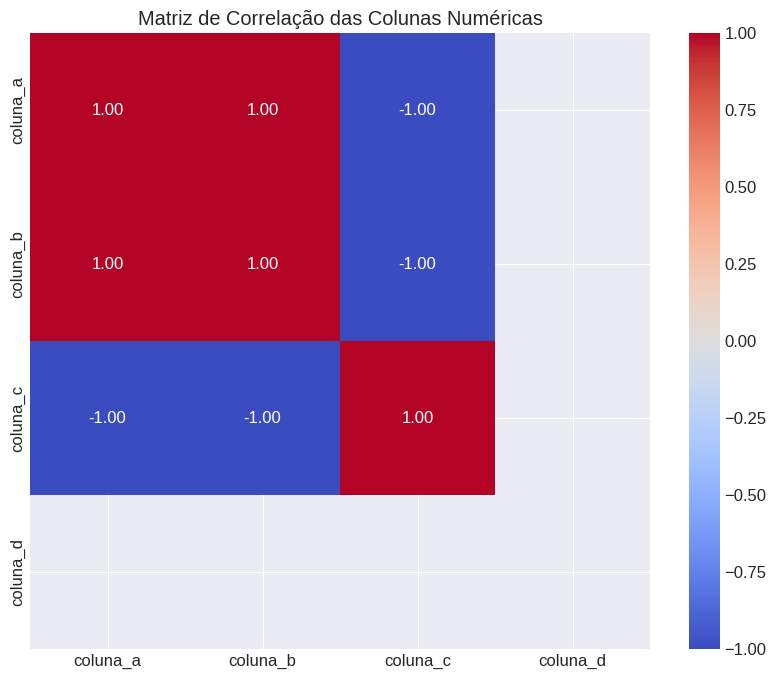

In [ ]:
data = {'coluna_a': [1, 2, 3, 4, 5],
        'coluna_b': [2, 4, 6, 8, 10],
        'coluna_c': [10, 8, 6, 4, 2],
        'coluna_d': [5, 5, 5, 5, 5]}
df = pd.DataFrame(data)

matriz_correlacao = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Colunas Numéricas')
plt.show()

Com base na matriz de correlação, o par com a maior correlação positiva provavelmente é o par, já que tendem a ter uma forte relação.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chik0di/board-games-dataset-complete-features")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'board-games-dataset-complete-features' dataset.
Path to dataset files: /kaggle/input/board-games-dataset-complete-features


In [ ]:
df = pd.read_csv(f"{path}/boardgame-geek-dataset_organized.csv")

In [ ]:
df['Decada'] = (df['release_year'] // 10) * 10

print(df.head())

   row_id                          boardgame  release_year  min_players  \
0       1                  Brass: Birmingham          2018            2   
1       2          Pandemic Legacy: Season 1          2015            2   
2       3                           Ark Nova          2021            1   
3       4                         Gloomhaven          2017            1   
4       5  Twilight Imperium: Fourth Edition          2017            3   

   max_players  min_playtime  max_playtime  minimum_age  avg_rating  \
0            4            60           120           14       8.575   
1            4            60            60           13       8.512   
2            4            90           150           14       8.539   
3            4            60           120           14       8.557   
4            6           240           480           14       8.572   

   num_ratings  ...  rank_thematic  rank_family  rank_war  rank_customizable  \
0        53548  ...            NaN        

In [ ]:
contagem_por_decada = df['Decada'].value_counts().sort_index()
print(contagem_por_decada)

Decada
0          3
1470       1
1580       1
1630       1
1800       1
1810       1
1850       1
1870       1
1920       1
1950       1
1960       2
1970       9
1980      25
1990      74
2000     280
2010    1031
2020     567
Name: count, dtype: int64


2010, com 1031 lançamentos